In [2]:
#import numpy,matplotlib,pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load the dataset
LoadDataset=pd.read_csv('Data/loan_data_2007_2014.csv')

#create a copy of original dataset so that orginal dataframe is not disturbed
Load_DS=LoadDataset.copy()

Load_DS
#print the basic info of the dataframe
Load_DS.info()

C:\Users\User\AppData\Local\Temp\ipykernel_27880\4062310861.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  LoadDataset=pd.read_csv('Data/loan_data_2007_2014.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [3]:
Load_DS.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# PRE-PROCESING

In [4]:
#check the emp-length column unique values
Load_DS.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [21]:
#replace all the extra letters and convert this column into numeric format

#one-sample conversion code is written write for the rest
Load_DS['emp_length_int']=Load_DS['emp_length'].str.replace('\+ years','')


Load_DS['emp_length_int']=Load_DS['emp_length_int'].str.replace(' years','')
Load_DS['emp_length_int']=Load_DS['emp_length_int'].str.replace(' year','')

Load_DS['emp_length_int']=Load_DS['emp_length_int'].str.replace('< ','')
Load_DS['emp_length_int']=Load_DS['emp_length_int'].str.replace('n/a','0')

# Load_DS['emp_length_int']=


C:\Users\User\AppData\Local\Temp\ipykernel_27880\113469854.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  Load_DS['emp_length_int']=Load_DS['emp_length'].str.replace('\+ years','')


In [22]:
Load_DS['emp_length_int'].unique()

array(['10', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [23]:
#check the type of emp_length_int
type(Load_DS['emp_length_int'][0])

str

In [24]:
#convert it into numrical format
Load_DS['emp_length_int'] =  pd.to_numeric(Load_DS['emp_length_int'])

In [29]:
#check the type of emp_length_int
type(Load_DS['emp_length_int'][0])

numpy.float64

In [30]:
#print the dataframe
Load_DS

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN,4.0
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN,10.0
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN,7.0
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN,3.0


In [39]:
#repeating the similar steps as we have done for previous column emp_length

#check the unique values of term column
Load_DS.term.unique()
Load_DS.term=Load_DS.term.str.replace(' months','')
Load_DS.term=Load_DS.term.str.replace(' ','')

In [40]:

Load_DS.term.unique()

array(['36', '60'], dtype=object)

In [41]:
#convert it into numrical format
Load_DS['term_int']=pd.to_numeric(Load_DS.term)

In [43]:
#check he type
type(Load_DS.term_int[0])

numpy.int64

In [44]:
#check for the column called earliest_cr_line
Load_DS.earliest_cr_line

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [46]:
type(Load_DS.earliest_cr_line[0])

str

In [47]:
#convert into datetime
Load_DS['earliest_cr_line_date']=pd.to_datetime(Load_DS['earliest_cr_line'], format='%b-%y')

In [50]:
Load_DS['earliest_cr_line_date']

0        1985-01-01
1        1999-04-01
2        2001-11-01
3        1996-02-01
4        1996-01-01
            ...    
466280   2003-04-01
466281   1997-06-01
466282   2001-12-01
466283   2003-02-01
466284   2000-02-01
Name: earliest_cr_line_date, Length: 466285, dtype: datetime64[ns]

In [49]:
#check the newly created column i.e 'earliest_cr_line_date'
type(Load_DS.earliest_cr_line_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [51]:
#get the total number of days from current date i.e present date
pd.to_datetime('2023-05-28')-Load_DS['earliest_cr_line_date']

0        14026 days
1         8823 days
2         7878 days
3         9978 days
4        10009 days
            ...    
466280    7362 days
466281    9492 days
466282    7848 days
466283    7421 days
466284    8517 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [56]:
#convert these days into months i.e converting days into months
Load_DS['mths_since_earliest_cr_line']=round(pd.to_numeric((pd.to_datetime('2023-05-28')-Load_DS['earliest_cr_line_date'])/np.timedelta64(1,'M')))

In [57]:
#check the basic statistics of 'mths_since_earliest_cr_line'
Load_DS['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        305.482430
std          93.974829
min        -546.000000
25%         249.000000
50%         291.000000
75%         351.000000
max         653.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [61]:
#check the dataframe for column that have negitive months which is not possible
Load_DS.loc[: , ['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][Load_DS['mths_since_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-471.0
1770,Sep-68,2068-09-01,-543.0
2799,Sep-64,2064-09-01,-495.0
3282,Sep-67,2067-09-01,-531.0
3359,Feb-65,2065-02-01,-500.0
...,...,...,...
464003,Jan-68,2068-01-01,-535.0
464260,Jul-66,2066-07-01,-517.0
465100,Oct-67,2067-10-01,-532.0
465500,Sep-67,2067-09-01,-531.0


In [63]:
#replace all the negitive values  with the max months value
Load_DS['mths_since_earliest_cr_line'][Load_DS['mths_since_earliest_cr_line'] < 0 ]=Load_DS['mths_since_earliest_cr_line'].max()

C:\Users\User\AppData\Local\Temp\ipykernel_27880\1729937353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Load_DS['mths_since_earliest_cr_line'][Load_DS['mths_since_earliest_cr_line'] < 0 ]=Load_DS['mths_since_earliest_cr_line'].max()


In [64]:
#again check the basic stats so that no months are negitive
Load_DS['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        308.385374
std          86.460310
min         139.000000
25%         250.000000
50%         292.000000
75%         351.000000
max         653.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [65]:
#chekc the issue_d column
Load_DS.issue_d

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [66]:
type(Load_DS.issue_d[0])

str

In [67]:
#repeat the similar steps as we have done for 'earliest_cr_line'


#convert into date_time format
Load_DS['issue_date']=pd.to_datetime(Load_DS.issue_d,format="%b-%y")

In [70]:
#get the number of days from present date
pd.to_datetime('2023-05-28')-Load_DS['issue_date']

0        4196 days
1        4196 days
2        4196 days
3        4196 days
4        4196 days
            ...   
466280   3434 days
466281   3434 days
466282   3434 days
466283   3434 days
466284   3434 days
Name: issue_date, Length: 466285, dtype: timedelta64[ns]

In [71]:
#convert days to months
Load_DS['mths_since_issued_date']=round(pd.to_numeric((pd.to_datetime('2023-05-28')-Load_DS['issue_date'])/np.timedelta64(1,'M')))

In [72]:
#check the basic stats
Load_DS['mths_since_issued_date'].describe()

count    466285.000000
mean        117.255187
std          14.340154
min         102.000000
25%         107.000000
50%         113.000000
75%         123.000000
max         192.000000
Name: mths_since_issued_date, dtype: float64

In [76]:
#check the 'delinq_2yrs' column and convert it into float type
Load_DS['delinq_2yrs']=Load_DS['delinq_2yrs'].astype('float')

In [77]:
Load_DS.delinq_2yrs

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
466280    0.0
466281    0.0
466282    0.0
466283    3.0
466284    1.0
Name: delinq_2yrs, Length: 466285, dtype: float64

In [78]:
#check the basic stats
Load_DS['delinq_2yrs'].describe()

count    466256.000000
mean          0.284678
std           0.797365
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64

PREPROCESSING MISSING DATA

In [79]:
Load_DS['grade']

0         B
1         C
2         C
3         C
4         B
         ..
466280    C
466281    D
466282    D
466283    A
466284    D
Name: grade, Length: 466285, dtype: object

In [80]:
#Get the dummies value for the column 'grade',,,apply a (prefix='grade') and (prefix_sep=":")
pd.get_dummies(Load_DS['grade'],prefix='grade',prefix_sep=':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [81]:
#Similarly apply the dummy creation step for 'grade','sub_grade','home_ownership','verification_status','loan_status','purpose','addr_state','initial_list_status' in one list_comprehension
Load_dumies_Data=[pd.get_dummies(Load_DS['grade'],prefix='grade',prefix_sep=':'),
                 pd.get_dummies(Load_DS['sub_grade'],prefix='sub_grade',prefix_sep=':'),
                 pd.get_dummies(Load_DS['home_ownership'],prefix='home_ownership',prefix_sep=':'),
                 pd.get_dummies(Load_DS['verification_status'],prefix='verification_status',prefix_sep=':'),
                 pd.get_dummies(Load_DS['loan_status'],prefix='loan_status',prefix_sep=':'),
                 pd.get_dummies(Load_DS['purpose'],prefix='purpose',prefix_sep=':'),
                 pd.get_dummies(Load_DS['addr_state'],prefix='addr_state',prefix_sep=':'),
                 pd.get_dummies(Load_DS['initial_list_status'],prefix='initial_list_status',prefix_sep=':')]
                 
                 
                 
                 
                 
                                                                                         

In [83]:
#concat all and create a dataframe
Load_dumies_Data=pd.concat(Load_dumies_Data, axis=1)

In [84]:
#check the dummy var dataframe
Load_dumies_Data

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
466281,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
466282,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
466283,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [85]:
#conact this dummy var dataframe with the original Load_DS dataframe
Load_DS=pd.concat([Load_DS,Load_dumies_Data], axis=1)

In [86]:
#check the column names
Load_DS.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'addr_state:TX', 'addr_state:UT', 'addr_state:VA', 'addr_state:VT',
       'addr_state:WA', 'addr_state:WI', 'addr_state:WV', 'addr_state:WY',
       'initial_list_status:f', 'initial_list_status:w'],
      dtype='object', length=207)

MISSING VALUES

In [88]:
pd.options.display.max_rows=None

In [89]:
#chekc the missing values
Load_DS.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [90]:
pd.options.display.max_rows =100

In [97]:
#fill the null values in column 'total_rev_hi_lim' with Loan_DS['funded_amt']
Load_DS['total_rev_hi_lim'].fillna(Load_DS['funded_amnt'],inplace=True)

In [98]:
#check the null values in column 'total_rev_hi_lim'
Load_DS['total_rev_hi_lim'].isnull().sum()

0

In [99]:
#fill the 'annual_inc' null values with mean value of 'annual_inc' column
Load_DS['annual_inc'].fillna(Load_DS['annual_inc'].mean(),inplace=True)

In [100]:
#check the null values in 'annual_inc'
Load_DS['annual_inc'].isnull().sum()

0

In [104]:
type(Load_DS['acc_now_delinq'][0])

numpy.float64

In [102]:
#fill all null values in column 'mths_since_earliest_cr_line' with '0'
Load_DS['mths_since_earliest_cr_line'].fillna(0,inplace=True)

In [103]:
#check the sum of null values for this column
Load_DS['mths_since_earliest_cr_line'].isnull().sum()

0

In [105]:
#fill all null values in column 'acc_now_delinq' with '0'
Load_DS['acc_now_delinq'].fillna(0,inplace=True)

In [106]:
#check the sum of null values for this column
Load_DS['acc_now_delinq'].isnull().sum()

0

In [108]:
#fill all null values in column 'total_Acc' with '0'
Load_DS['total_acc'].fillna(0,inplace=True)

In [109]:
#similary fill the columns 'pub_rec','open_acc','inq_last_6mths','delinq_2yrs','emp_length_int' with '0'
Load_DS['pub_rec'].fillna('0',inplace=True)
Load_DS['open_acc'].fillna('0',inplace=True)
Load_DS['inq_last_6mths'].fillna('0',inplace=True)
Load_DS['delinq_2yrs'].fillna('0',inplace=True)
Load_DS['emp_length_int'].fillna('0',inplace=True)

PD(PROBABLITY OF DEFAULT)

Building the Weight of expetency values

In [110]:
#check the unique values in our final output column i.e 'loan_status'
Load_DS['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [111]:
#chekc the value_counts for loan_status
Load_DS['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [112]:
Load_DS['loan_status'].count()

466285

In [113]:
#check the percentage of distribution
Load_DS['loan_status'].value_counts()/Load_DS['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [114]:
#binary encoding of our target variable
Load_DS['good_bad']=np.where(Load_DS['loan_status'].isin(['Charged Off','Default','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)']),0,1)

In [115]:
Load_DS['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int32

In [117]:
#import train-test split
from sklearn.model_selection import train_test_split

In [118]:
#applying the train_test split
load_ds_input_train,load_ds_input_test,load_ds_targets_train,load_ds_targets_test=train_test_split(Load_DS.drop('good_bad', axis = 1), Load_DS['good_bad'],test_size=0.2,random_state=42)

In [127]:
#check the shape of training and testing dataset:


load_ds_targets_test.head()

362514    1
288564    1
213591    1
263083    1
165001    1
Name: good_bad, dtype: int32

In [129]:
load_ds_input_train

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
427211,427211,12796369,14818505,24000,24000,24000.0,36,8.90,762.08,A,...,0,0,0,0,0,0,0,0,1,0
206088,206088,1439740,1691948,10000,10000,10000.0,36,14.33,343.39,C,...,0,0,0,0,0,0,0,0,1,0
136020,136020,5214749,6556909,20425,20425,20425.0,36,8.90,648.56,A,...,0,0,0,0,0,0,0,0,1,0
412305,412305,13827698,15890016,17200,17200,17200.0,36,16.59,609.73,D,...,0,0,0,0,0,0,0,0,1,0
36159,36159,422455,496525,8400,8400,7450.0,36,12.84,282.40,C,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,259178,34392215,37055507,5000,5000,5000.0,36,8.67,158.24,B,...,0,0,0,0,0,0,0,0,0,1
365838,365838,19345890,21548652,20000,20000,20000.0,36,12.49,668.98,B,...,0,0,0,0,0,0,0,0,1,0
131932,131932,5145550,6467765,19200,19200,19175.0,36,14.09,657.06,B,...,0,0,0,0,0,0,0,0,1,0
146867,146867,4374922,5607101,15500,15500,15500.0,36,11.14,508.48,B,...,0,0,0,0,0,0,0,0,1,0


DATA PREPARATION

In [124]:
#Let's so deep into data prepartion because we need to build the score-card:

df_inputs_prepr = load_ds_input_train
df_targets_prepr = load_ds_targets_train



In [130]:
df_targets_prepr

427211    1
206088    1
136020    1
412305    0
36159     0
         ..
259178    1
365838    1
131932    1
146867    1
121958    1
Name: good_bad, Length: 373028, dtype: int32

In [125]:
#check the unique values for 'grade' column
df_inputs_prepr['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [147]:
#concat grade with df_target_prepr col and create a dataframe
df1= pd.concat([df_inputs_prepr['grade'], df_targets_prepr],axis=1)


In [137]:
df1[df1['grade']=='A'][df1['good_bad']==0]

C:\Users\User\AppData\Local\Temp\ipykernel_27880\960748899.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[df1['grade']=='A'][df1['good_bad']==0]


,grade,good_bad
222888,A,0
161567,A,0
14884,A,0
223151,A,0
450050,A,0
...,...,...
438741,A,0
8155,A,0
183734,A,0
208261,A,0


In [133]:
#group by grade and check number of records in each grade
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,59759
1,B,109730
2,C,100245
3,D,61498
4,E,28612
5,F,10530
6,G,2654


In [162]:
# df1.groupby(df1.columns.values[0],as_index=False)
df1.columns.values[1]

'n_obs'

In [134]:
#get the mean of the number of records i.e here we will get only for good loans only that has binary value as '1'
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.961044
1,B,0.921015
2,C,0.885770
3,D,0.846304
4,E,0.805257
5,F,0.754416
6,G,0.727958


In [148]:
#create a dataframe that has the number of records and mean records for grade
df1=pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count(),
             df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)

In [149]:
#print df1
df1.head(10)

,grade,good_bad,grade,good_bad
0,A,59759,A,0.961044
1,B,109730,B,0.921015
2,C,100245,C,0.885770
3,D,61498,D,0.846304
4,E,28612,E,0.805257
5,F,10530,F,0.754416
6,G,2654,G,0.727958


In [150]:
#remove the grade column as it is twice
df1=df1.iloc[:,[0,1,3]]

In [151]:
df1.head(10)

,grade,good_bad,good_bad
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [152]:
df1.columns.values[0]

'grade'

In [157]:
#replacing the column names to make it more representable
df1.columns=[df1.columns.values[0],'n_obs','prop_good']

In [158]:
df1


,grade,n_obs,prop_good
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [ ]:
#get the proportion of n_obs
df1['prop_n_obs']=df1['n_obs']/df1['n_obs'].sum()

In [163]:
df1

,grade,n_obs,prop_good
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [164]:
#calculating the number of good varriables and bad varrirables

df1['n_good']=df1['prop_good']*df1['n_obs']
df1['n_bad']=(1-df1['prop_good'])*df1['n_obs']
df1

,grade,n_obs,prop_good,n_good,n_bad
0,A,59759,0.961044,57431.0,2328.0
1,B,109730,0.921015,101063.0,8667.0
2,C,100245,0.885770,88794.0,11451.0
3,D,61498,0.846304,52046.0,9452.0
4,E,28612,0.805257,23040.0,5572.0
5,F,10530,0.754416,7944.0,2586.0
6,G,2654,0.727958,1932.0,722.0


In [166]:
#check the proportion of good and bad variables
df1['prop_n_good']=df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad']=df1['n_bad']/df1['n_good'].sum()
df1

,grade,n_obs,prop_good,n_good,n_bad,prop_n_good,prop_n_bad
0,A,59759,0.961044,57431.0,2328.0,0.172855,0.007007
1,B,109730,0.921015,101063.0,8667.0,0.304178,0.026086
2,C,100245,0.885770,88794.0,11451.0,0.267251,0.034465
3,D,61498,0.846304,52046.0,9452.0,0.156647,0.028448
4,E,28612,0.805257,23040.0,5572.0,0.069345,0.016771
5,F,10530,0.754416,7944.0,2586.0,0.023910,0.007783
6,G,2654,0.727958,1932.0,722.0,0.005815,0.002173


In [167]:
#calculate the Weight of Expetency(WOE):

df1['WoE']=np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,59759,0.961044,57431.0,2328.0,0.172855,0.007007,3.205575
1,B,109730,0.921015,101063.0,8667.0,0.304178,0.026086,2.456221
2,C,100245,0.885770,88794.0,11451.0,0.267251,0.034465,2.048242
3,D,61498,0.846304,52046.0,9452.0,0.156647,0.028448,1.705902
4,E,28612,0.805257,23040.0,5572.0,0.069345,0.016771,1.419478
5,F,10530,0.754416,7944.0,2586.0,0.023910,0.007783,1.122305
6,G,2654,0.727958,1932.0,722.0,0.005815,0.002173,0.984286


In [168]:
#reset the index of the df1 dataframe and sort the values according to WoE

df1= df1.sort_values(['WoE'])
df1=df1.reset_index(drop=True)
df1

,grade,n_obs,prop_good,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2654,0.727958,1932.0,722.0,0.005815,0.002173,0.984286
1,F,10530,0.754416,7944.0,2586.0,0.023910,0.007783,1.122305
2,E,28612,0.805257,23040.0,5572.0,0.069345,0.016771,1.419478
3,D,61498,0.846304,52046.0,9452.0,0.156647,0.028448,1.705902
4,C,100245,0.885770,88794.0,11451.0,0.267251,0.034465,2.048242
5,B,109730,0.921015,101063.0,8667.0,0.304178,0.026086,2.456221
6,A,59759,0.961044,57431.0,2328.0,0.172855,0.007007,3.205575


In [169]:
#calculate the difference in prop_good and WoE:

df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE']=df1['WoE'].diff().abs()

In [ ]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.002173,0.984286,NaN,NaN
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.007783,1.122305,0.026458,0.138019
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.016771,1.419478,0.050841,0.297173
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.028448,1.705902,0.041047,0.286424
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.034465,2.048242,0.039466,0.342340
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.026086,2.456221,0.035245,0.407979
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.007007,3.205575,0.040028,0.749353


In [170]:
#calculate the IV:implied volatility:

df1['IV'] = df1['prop_n_good'] - df1['prop_n_bad']*df1['WoE']
df1['IV']=df1['IV'].sum()
df1

,grade,n_obs,prop_good,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,1932.0,722.0,0.005815,0.002173,0.984286,NaN,NaN,0.759664
1,F,10530,0.754416,7944.0,2586.0,0.023910,0.007783,1.122305,0.026458,0.138019,0.759664
2,E,28612,0.805257,23040.0,5572.0,0.069345,0.016771,1.419478,0.050841,0.297173,0.759664
3,D,61498,0.846304,52046.0,9452.0,0.156647,0.028448,1.705902,0.041047,0.286424,0.759664
4,C,100245,0.885770,88794.0,11451.0,0.267251,0.034465,2.048242,0.039466,0.342340,0.759664
5,B,109730,0.921015,101063.0,8667.0,0.304178,0.026086,2.456221,0.035245,0.407979,0.759664
6,A,59759,0.961044,57431.0,2328.0,0.172855,0.007007,3.205575,0.040028,0.749353,0.759664


In [171]:
#Create a final function for the the data prepation steps so that we don't need to write this code again and again

def woe_discrete(df,discrete_variable_name,good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)
    df= df.iloc[:,[0,1,3]]
    df.columns=[df1.columns.values[0],'n_obs','prop_good']
    df['prop_n_obs']=df['n_obs']/df['n_obs'].sum()
    df['n_good']=df['prop_good']*df['n_obs']
    df['n_bad']=(1-df['prop_good'])*df['n_obs']
    df['prop_n_good']=df['n_good']/df['n_good'].sum()
    df['prop_n_bad']=df['n_bad']/df['n_good'].sum()
    df['WoE']=np.log(df['prop_n_good']/df['prop_n_bad'])
    df= df.sort_values(['WoE'])
    df=df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE']=df['WoE'].diff().abs()
    df['IV'] = df['prop_n_good'] - df['prop_n_bad']*df['WoE']
    df['IV']=df['IV'].sum()
    return df

In [180]:
#applying the function on 'grade' column:

df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.002173,0.984286,NaN,NaN,0.759664
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.007783,1.122305,0.026458,0.138019,0.759664
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.016771,1.419478,0.050841,0.297173,0.759664
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.028448,1.705902,0.041047,0.286424,0.759664
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.034465,2.048242,0.039466,0.342340,0.759664
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.026086,2.456221,0.035245,0.407979,0.759664
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.007007,3.205575,0.040028,0.749353,0.759664


PROCESSING DISCRETE VARIABLES:VISUALIZING RESULTS

In [181]:
#import the visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [182]:
#function for plotting of WoE:

def plot_by_woe(df_WoE,rotation_of_x_axis_labels=0):
    x=np.array(df_WoE.iloc[:,0].apply(str))
    y=df_WoE['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker = 'o',linestyle='--',color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('weight of evidence')
    plt.title(str('Weight of Evidence by ')+df_WoE.columns[0])
    plt.xticks(rotation=rotation_of_x_axis_labels)

**High WoE means the borrower chance to pay the loan on time is high:**

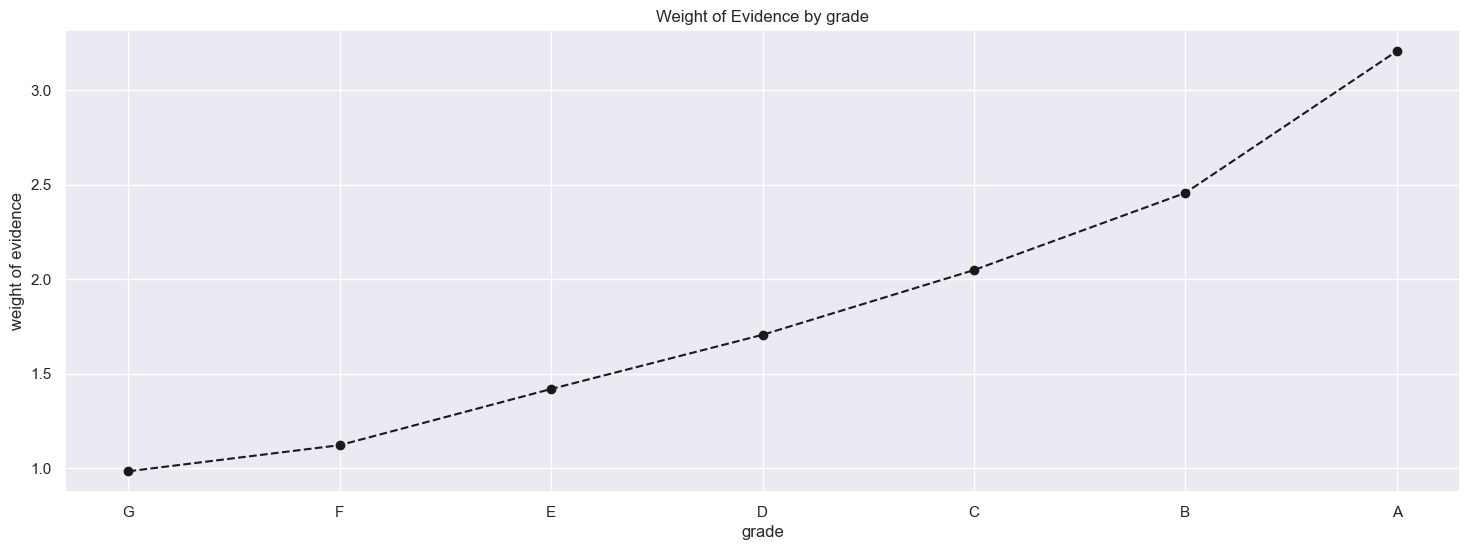

In [175]:
#pass the dataframe into the plot_by_woe function
plot_by_woe(df_temp)

Preprocessing Discrete Variables:Creating Dummy Variable,part1

In [186]:
#repeat the similar steps:

#pass the column 'home_ownership' and create the woe plot
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)

In [187]:
df_temp.head()

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,137,0.795620,0.000367,109.0,28.0,0.000328,0.000084,1.359143,NaN,NaN,0.743854
1,NONE,40,0.850000,0.000107,34.0,6.0,0.000102,0.000018,1.734601,0.054380,0.375458,0.743854
2,RENT,150599,0.873870,0.403720,131604.0,18995.0,0.396099,0.057171,1.935622,0.023870,0.201021,0.743854
3,OWN,33295,0.892536,0.089256,29717.0,3578.0,0.089442,0.010769,2.116915,0.018666,0.181294,0.743854
4,MORTGAGE,188956,0.903835,0.506546,170785.0,18171.0,0.514026,0.054691,2.240579,0.011298,0.123663,0.743854


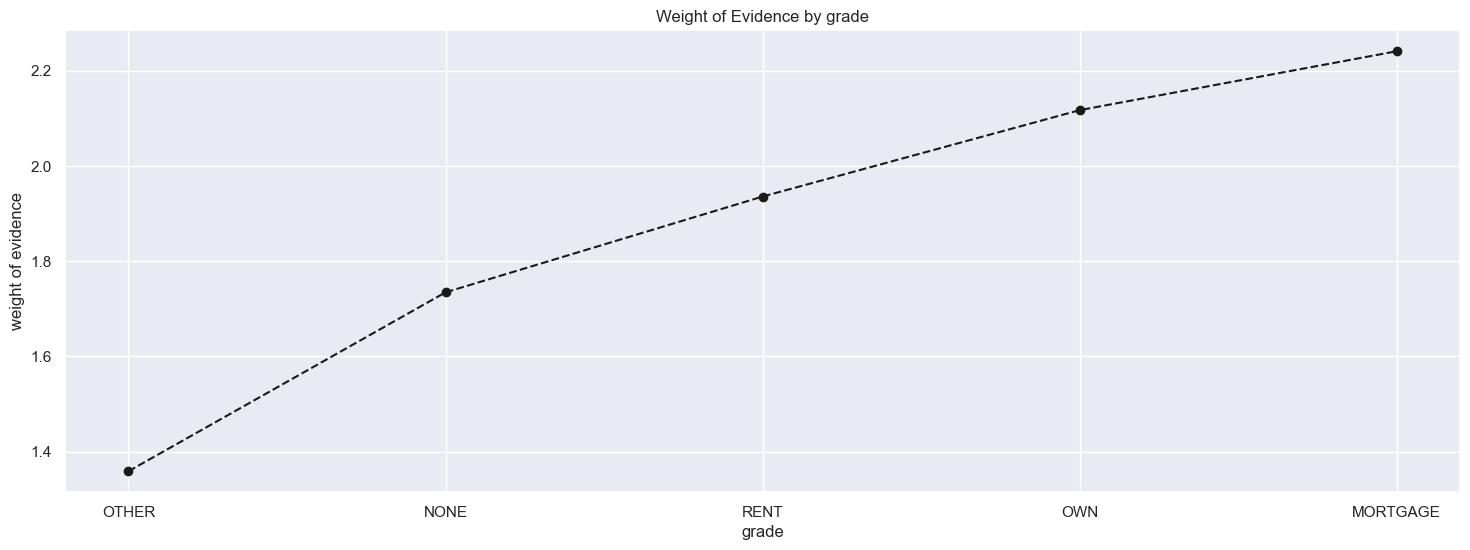

In [184]:
#plot the woe for 'home_ownersip'
plot_by_woe(df_temp)

In [188]:
#we will be creating one hot enconding for all these unique values in each column so we will try to minimize the number of unique values by merging the unique values:

#add the binary values of values 'RENT','OTHER','NONE','ANY' as they have similar WoE values
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],df_inputs_prepr['home_ownership:OTHER'],
                                                           df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

In [189]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY']

427211    0
206088    0
136020    0
412305    1
36159     0
         ..
259178    0
365838    1
131932    1
146867    0
121958    0
Name: home_ownership:RENT_OTHER_NONE_ANY, Length: 373028, dtype: uint8

PREPROCESSING DISCRETE VARRIABLES:DUMMMY VARRIABLES

In [191]:
#check the unique values in addr_state
df_inputs_prepr['addr_state'].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [192]:
#apply the function woe_discrete on 'addr_state'
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,13,0.461538,0.000035,6.0,7.0,0.000018,0.000021,-0.154151,NaN,NaN,0.743239
1,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000009,1.203973,0.307692,1.358123,0.743239
2,NV,5221,0.864585,0.013996,4514.0,707.0,0.013586,0.002128,1.853908,0.095355,0.649935,0.743239
3,FL,25211,0.875808,0.067585,22080.0,3131.0,0.066456,0.009424,1.953320,0.011223,0.099411,0.743239
4,HI,2001,0.877061,0.005364,1755.0,246.0,0.005282,0.000740,1.964893,0.001253,0.011573,0.743239
5,AL,4671,0.877328,0.012522,4098.0,573.0,0.012334,0.001725,1.967369,0.000267,0.002476,0.743239
6,NM,2075,0.883373,0.005563,1833.0,242.0,0.005517,0.000728,2.024772,0.006045,0.057403,0.743239
7,VA,11366,0.883864,0.030470,10046.0,1320.0,0.030236,0.003973,2.029543,0.000491,0.004771,0.743239
8,NY,32211,0.883984,0.086350,28474.0,3737.0,0.085701,0.011248,2.030708,0.000120,0.001165,0.743239
9,OK,3284,0.884287,0.008804,2904.0,380.0,0.008740,0.001144,2.033673,0.000304,0.002965,0.743239


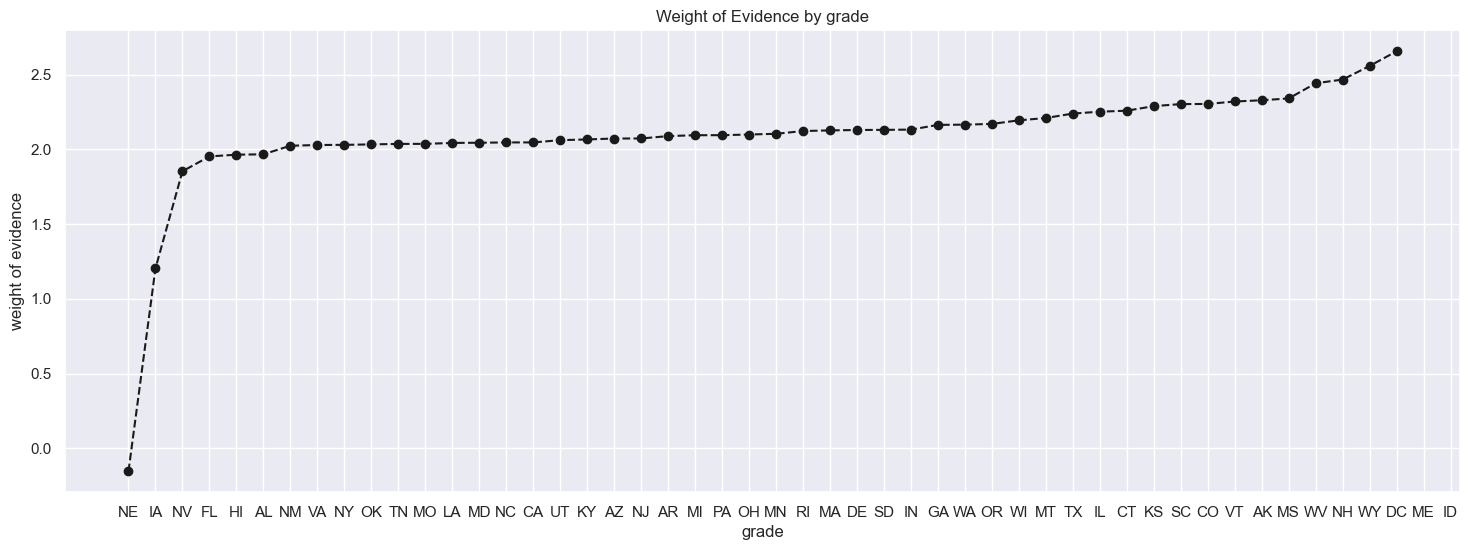

In [194]:
#plot the woe_plot
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp
plot_by_woe(df_temp)

In [195]:
#adding the state 'ND' if it is not present in columns and make it zero if not present
if['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND']=0

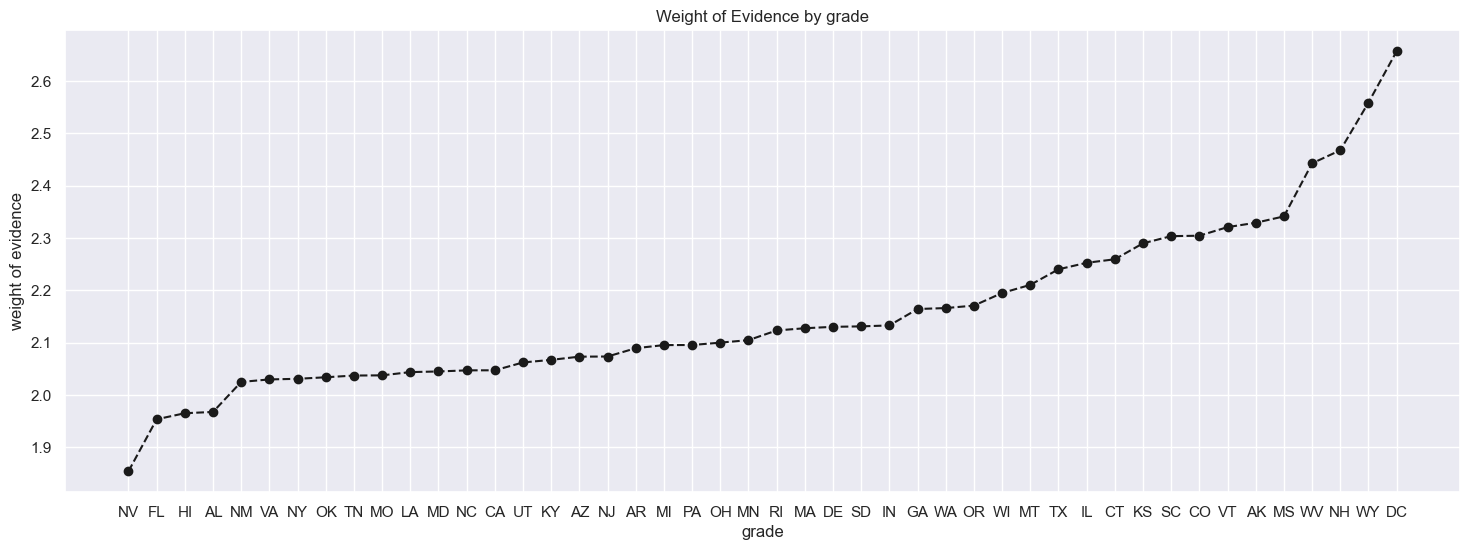

In [196]:
#plot the woe_plot
plot_by_woe(df_temp.iloc[2:-2,:])

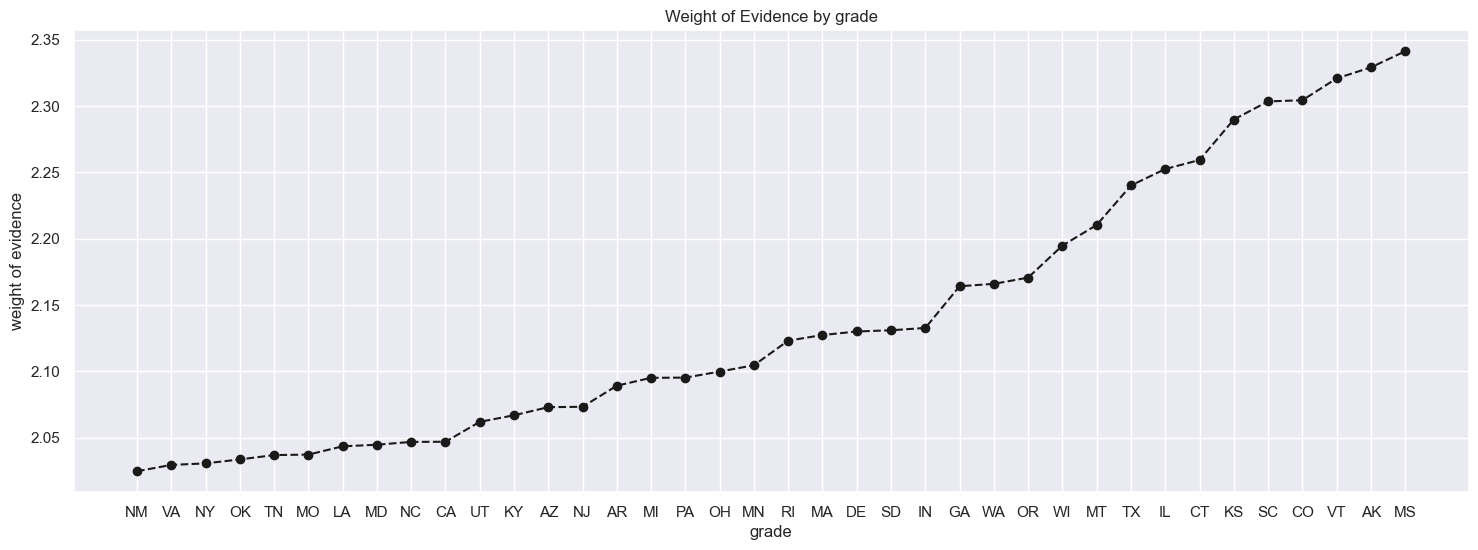

In [199]:
#woe_plot for values whose WoE values differs at large
plot_by_woe(df_temp.iloc[6:-6,:])

In [200]:
##add the binary values of values as they have similar WoE values


df_inputs_prepr['addr_state:ND_NE_IA_NC_FL_HI_AL']=sum([df_inputs_prepr['addr_state:ND'],df_inputs_prepr['addr_state:IA'],
                                                       df_inputs_prepr['addr_state:NE'],df_inputs_prepr['addr_state:NC'],
                                                       df_inputs_prepr['addr_state:FL'],df_inputs_prepr['addr_state:HI'], 
                                                       df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA']=sum([df_inputs_prepr['addr_state:NM'],df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC']=sum([df_inputs_prepr['addr_state:OK'],df_inputs_prepr['addr_state:TN'],
                                                       df_inputs_prepr['addr_state:MO'],df_inputs_prepr['addr_state:LA'],
                                                       df_inputs_prepr['addr_state:MD'],df_inputs_prepr['addr_state:NC']])


df_inputs_prepr['addr_state:UT_KY_AZ_NJ']=sum([df_inputs_prepr['addr_state:UT'],df_inputs_prepr['addr_state:KY'],
                                                       df_inputs_prepr['addr_state:AZ'],df_inputs_prepr['addr_state:NJ']])


df_inputs_prepr['addr_state:AR_MI_PA_OH_MN']=sum([df_inputs_prepr['addr_state:AR'],df_inputs_prepr['addr_state:MI'],
                                                       df_inputs_prepr['addr_state:PA'],df_inputs_prepr['addr_state:OH'],
                                                       df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN']=sum([df_inputs_prepr['addr_state:RI'],df_inputs_prepr['addr_state:MA'],
                                                       df_inputs_prepr['addr_state:DE'],df_inputs_prepr['addr_state:SD'],
                                                       df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR']=sum([df_inputs_prepr['addr_state:GA'],df_inputs_prepr['addr_state:WA'],
                                                       df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT']=sum([df_inputs_prepr['addr_state:WI'],df_inputs_prepr['addr_state:MT']])


df_inputs_prepr['addr_state:IL_CT']=sum([df_inputs_prepr['addr_state:IL'],df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS']=sum([df_inputs_prepr['addr_state:KS'],df_inputs_prepr['addr_state:SC'],
                                                       df_inputs_prepr['addr_state:CO'],df_inputs_prepr['addr_state:VT'],
                                                       df_inputs_prepr['addr_state:AK'],df_inputs_prepr['addr_state:MS']])


df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID']=sum([df_inputs_prepr['addr_state:WV'],df_inputs_prepr['addr_state:NH'],
                                                       df_inputs_prepr['addr_state:WY'],df_inputs_prepr['addr_state:DC'],
                                                       df_inputs_prepr['addr_state:ME'],df_inputs_prepr['addr_state:ID']])

In [201]:
#check the unique values of verification_status column
df_inputs_prepr['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

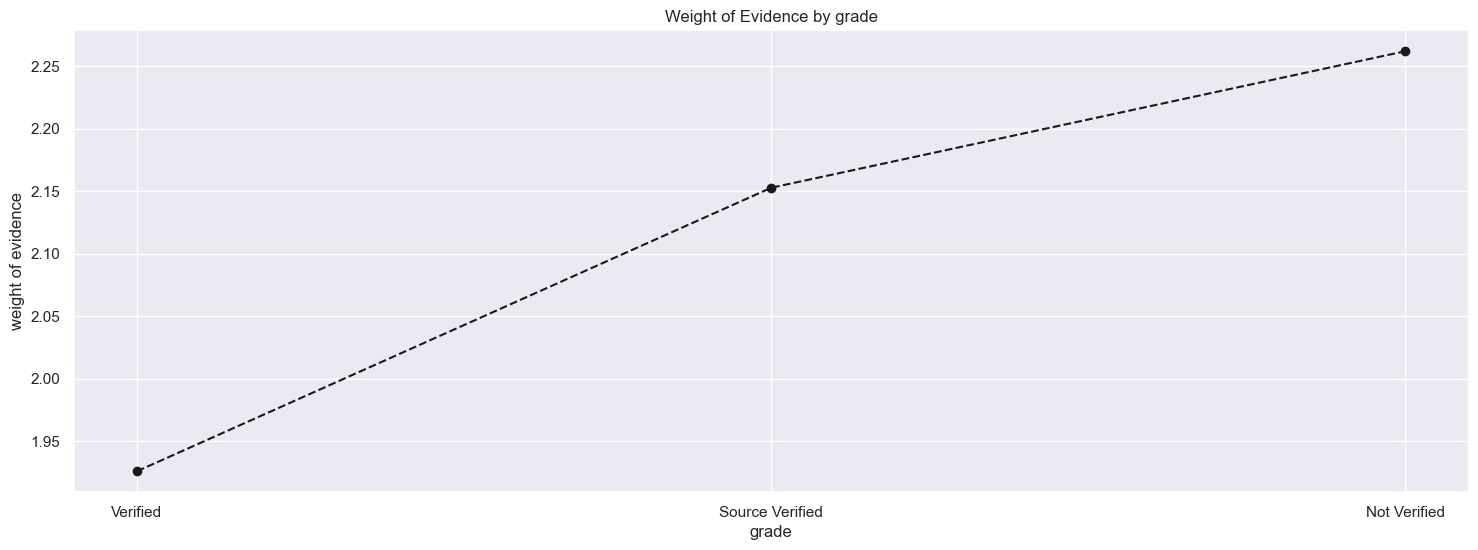

In [202]:
#apply the woe_discrete function
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp
plot_by_woe(df_temp)

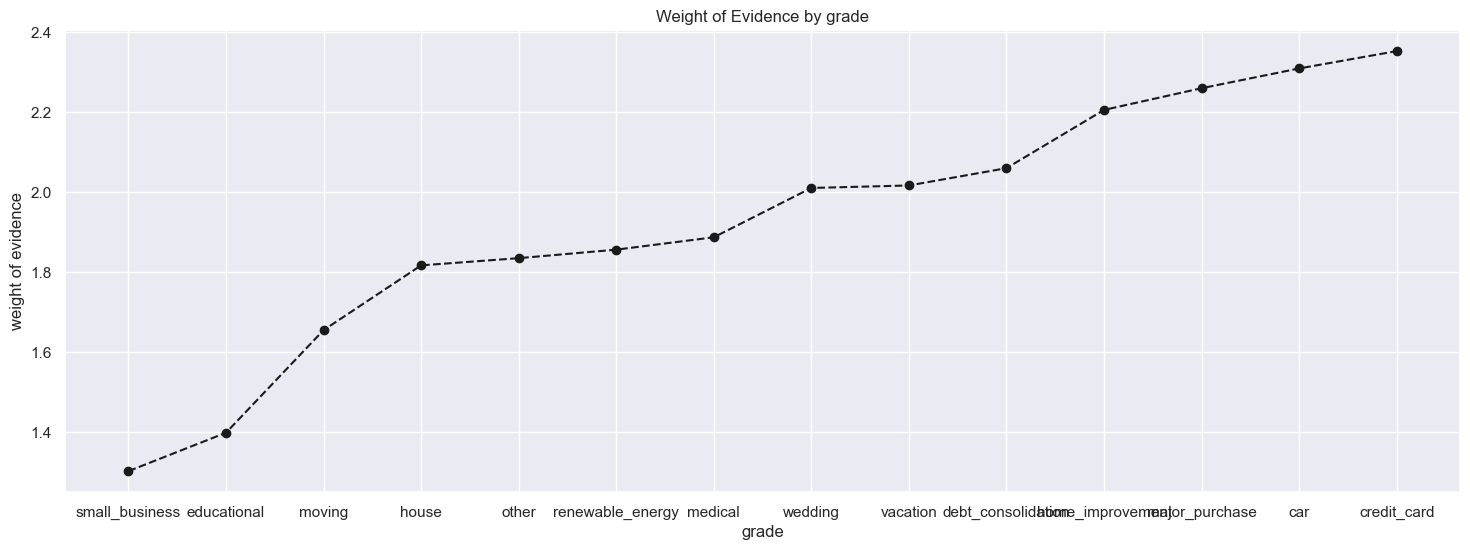

In [203]:
#check the unique values of 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp
plot_by_woe(df_temp)

In [204]:
#make all the similar woe values in one column

df_inputs_prepr['purpose:educ_sm_b_wedd_ren_en_mov_house']=sum([df_inputs_prepr['purpose:small_business'],df_inputs_prepr['purpose:educational'],
                                                               df_inputs_prepr['purpose:renewable_energy'],df_inputs_prepr['purpose:moving'],
                                  -                              df_inputs_prepr['purpose:house'],df_inputs_prepr['purpose:other'],
                                                               df_inputs_prepr['purpose:medical'],df_inputs_prepr['purpose:wedding'],
                                                               df_inputs_prepr['purpose:vacation'],df_inputs_prepr['purpose:debt_consolidation'],
                                                               df_inputs_prepr['purpose:home_improvement'],df_inputs_prepr['purpose:major_purchase'],
                                                               df_inputs_prepr['purpose:car'],df_inputs_prepr['purpose:credit_card']])

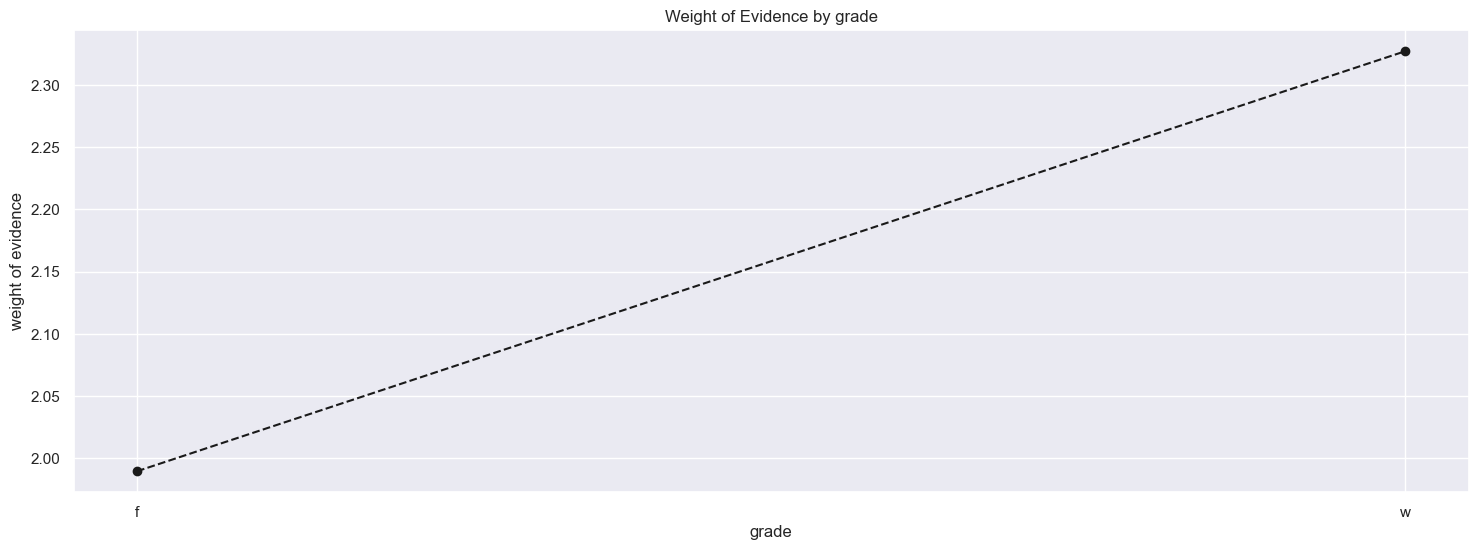

In [205]:
#check the 'initial_list_status' unique values
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp
plot_by_woe(df_temp)

PREPROCESSING CONTINUOUS VARIABLES:AUTOMATING CALCULATIONS AND VISUALIZING RESULTS

In [207]:
#Earlier we defined a function for categorical values

#Now, this is the function for preprocessing of continuous variables

def woe_continuous(df,discrete_variable_name,good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)
    df= df.iloc[:,[0,1,3]]
    df.columns=[df1.columns.values[0],'n_obs','prop_good']
    df['prop_n_obs']=df['n_obs']/df['n_obs'].sum()
    df['n_good']=df['prop_good']*df['n_obs']
    df['n_bad']=(1-df['prop_good'])*df['n_obs']
    df['prop_n_good']=df['n_good']/df['n_good'].sum()
    df['prop_n_bad']=df['n_bad']/df['n_good'].sum()
    df['WoE']=np.log(df['prop_n_good']/df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE']=df['WoE'].diff().abs()
    df['IV'] = df['prop_n_good'] - df['prop_n_bad']*df['WoE']
    df['IV']=df['IV'].sum()
    return df

PREPROCESSING CONTNUOUS VARIABLES:CREATING DUMMY VARIABLES

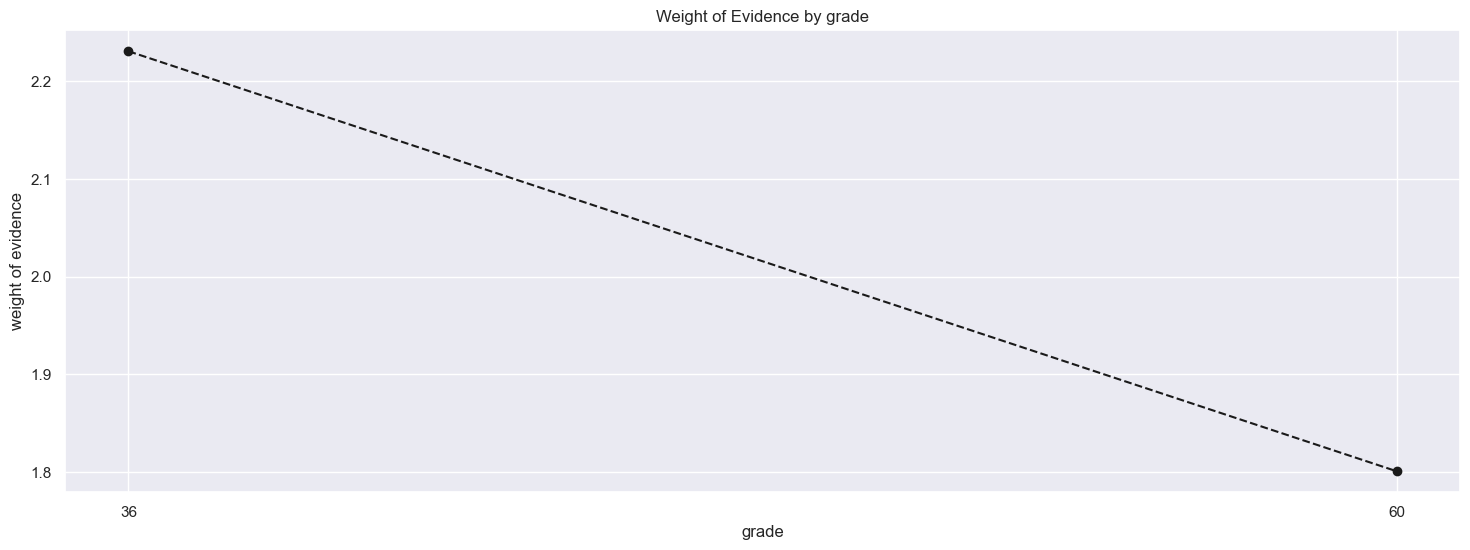

In [208]:
#check the 'term_int' unique values
df_temp = woe_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp
plot_by_woe(df_temp)

In [209]:
#Convert it into binary encoded format by putting 1 and 0 inplace

df_inputs_prepr['term:36']=np.where((df_inputs_prepr['term_int'] ==36),1,0)
df_inputs_prepr['term:60']=np.where((df_inputs_prepr['term_int']==60),1,0)

In [ ]:
#check the unique values of 'emp_length_int' column


array([3.0, 6.0, 10.0, 7.0, 5.0, 0.0, 2.0, 9.0, 1.0, 8.0, '0', 4.0],
      dtype=object)

In [210]:
#apply the woe_continuous function
df_temp = woe_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1.0,52566,0.883784,0.140917,46457.0,6109.0,0.139825,0.018387,2.028764,NaN,NaN,0.742958
1,2.0,33078,0.890955,0.088674,29471.0,3607.0,0.088701,0.010856,2.100530,0.007171,0.071766,0.742958
2,3.0,29205,0.890772,0.078292,26015.0,3190.0,0.078299,0.009601,2.098652,0.000183,0.001878,0.742958
3,4.0,22468,0.890644,0.060231,20011.0,2457.0,0.060229,0.007395,2.097341,0.000128,0.001311,0.742958
4,5.0,24602,0.884725,0.065952,21766.0,2836.0,0.065511,0.008536,2.037955,0.005920,0.059387,0.742958
5,6.0,20887,0.883899,0.055993,18462.0,2425.0,0.055567,0.007299,2.029883,0.000826,0.008071,0.742958
6,7.0,21049,0.887453,0.056427,18680.0,2369.0,0.056223,0.007130,2.064986,0.003554,0.035102,0.742958
7,8.0,17853,0.889878,0.047860,15887.0,1966.0,0.047816,0.005917,2.089500,0.002425,0.024515,0.742958
8,9.0,14267,0.886662,0.038246,12650.0,1617.0,0.038074,0.004867,2.057085,0.003217,0.032416,0.742958
9,10.0,120245,0.900312,0.322348,108258.0,11987.0,0.325833,0.036078,2.200695,0.013650,0.143610,0.742958


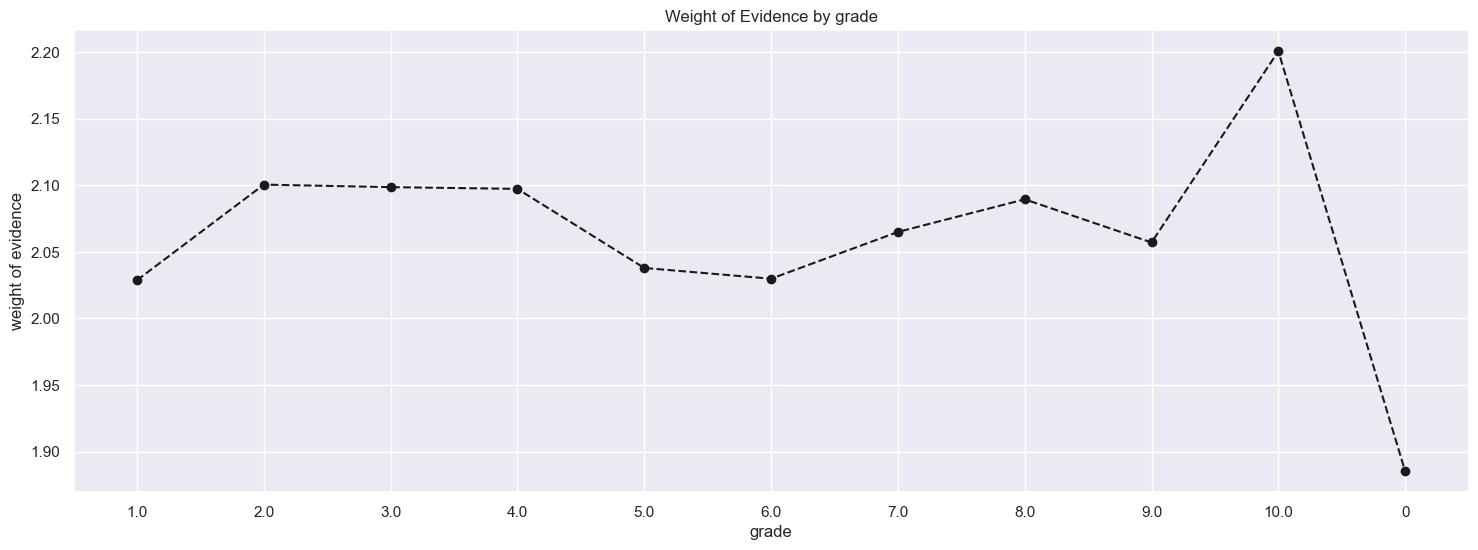

In [211]:
#plot the woe plot
plot_by_woe(df_temp)

In [212]:
##Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['emp_length:0']=np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
df_inputs_prepr['emp_length:1']=np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
df_inputs_prepr['emp_length:2-4']=np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)),1,0)
df_inputs_prepr['emp_length:5-6']=np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)),1,0)
df_inputs_prepr['emp_length:7-9']=np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)),1,0)
df_inputs_prepr['emp_length:10']=np.where(df_inputs_prepr['emp_length_int'].isin([10]),1,0)

In [213]:
#apply the cut function defined in pandas so that we get a range divided values for continous variable

df_inputs_prepr['mths_since_issued_date_factor']=pd.cut(df_inputs_prepr['mths_since_issued_date'],50)

In [214]:
#check how the buckets are divided
df_inputs_prepr['mths_since_issued_date_factor']

427211     (109.2, 111.0]
206088     (129.0, 130.8]
136020     (118.2, 120.0]
412305     (109.2, 111.0]
36159      (166.8, 168.6]
               ...       
259178    (101.91, 103.8]
365838     (107.4, 109.2]
131932     (118.2, 120.0]
146867     (121.8, 123.6]
121958     (118.2, 120.0]
Name: mths_since_issued_date_factor, Length: 373028, dtype: category
Categories (50, interval[float64, right]): [(101.91, 103.8] < (103.8, 105.6] < (105.6, 107.4] < (107.4, 109.2] ... (184.8, 186.6] < (186.6, 188.4] < (188.4, 190.2] < (190.2, 192.0]]

In [215]:
#apply the woe_continuous function
df_temp=woe_continuous(df_inputs_prepr,'mths_since_issued_date_factor',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(101.91, 103.8]",28170,0.942244,0.075517,26543.0,1627.0,0.079889,0.004897,2.792028,NaN,NaN,0.749411
1,"(103.8, 105.6]",39636,0.928424,0.106255,36799.0,2837.0,0.110757,0.008539,2.562724,0.013820,0.229305,0.749411
2,"(105.6, 107.4]",38614,0.917284,0.103515,35420.0,3194.0,0.106606,0.009613,2.406003,0.011140,0.156721,0.749411
3,"(107.4, 109.2]",29038,0.908603,0.077844,26384.0,2654.0,0.079410,0.007988,2.296690,0.008681,0.109313,0.749411
4,"(109.2, 111.0]",28367,0.901787,0.076045,25581.0,2786.0,0.076993,0.008385,2.217243,0.006815,0.079447,0.749411
5,"(111.0, 112.8]",12165,0.899301,0.032611,10940.0,1225.0,0.032927,0.003687,2.189485,0.002486,0.027758,0.749411
6,"(112.8, 114.6]",24451,0.898900,0.065547,21979.0,2472.0,0.066152,0.007440,2.185060,0.000401,0.004425,0.749411
7,"(114.6, 116.4]",22969,0.888328,0.061574,20404.0,2565.0,0.061412,0.007720,2.073772,0.010572,0.111287,0.749411
8,"(116.4, 118.2]",20640,0.880523,0.055331,18174.0,2466.0,0.054700,0.007422,1.997395,0.007804,0.076378,0.749411
9,"(118.2, 120.0]",18312,0.866863,0.049090,15874.0,2438.0,0.047777,0.007338,1.873505,0.013660,0.123890,0.749411


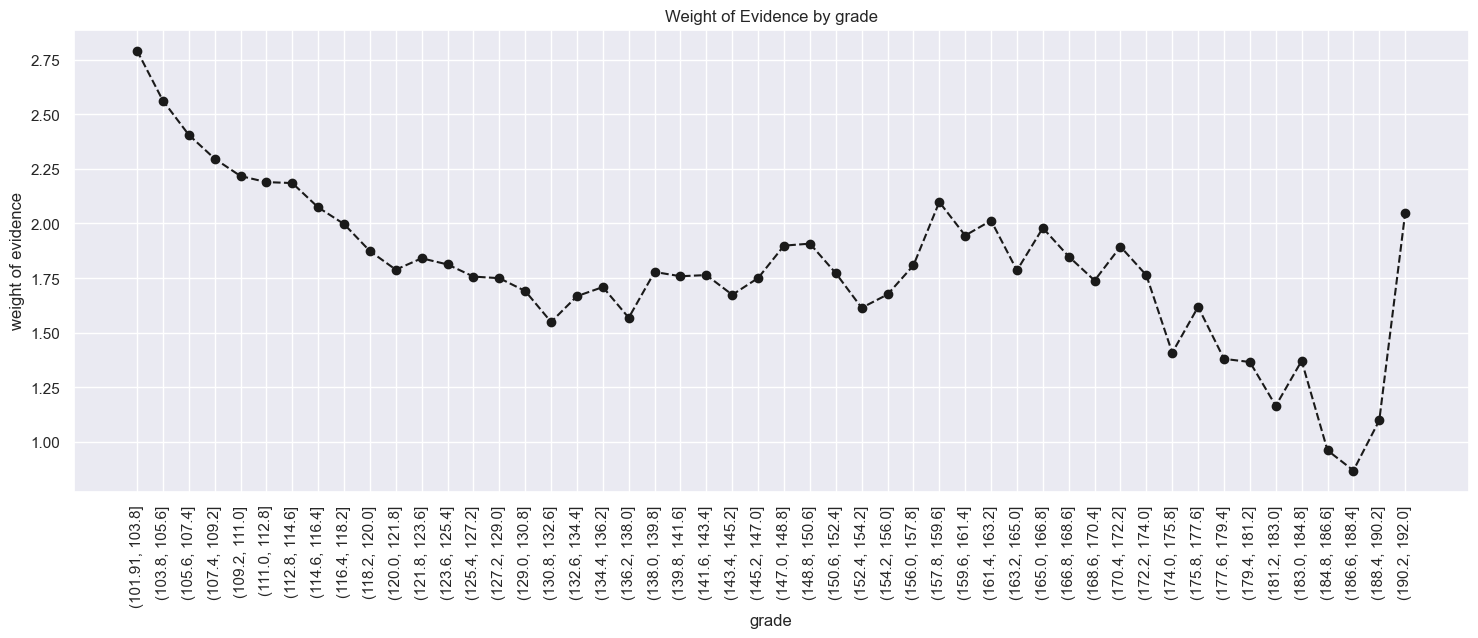

In [216]:
#plot the woe plot
plot_by_woe(df_temp,90)

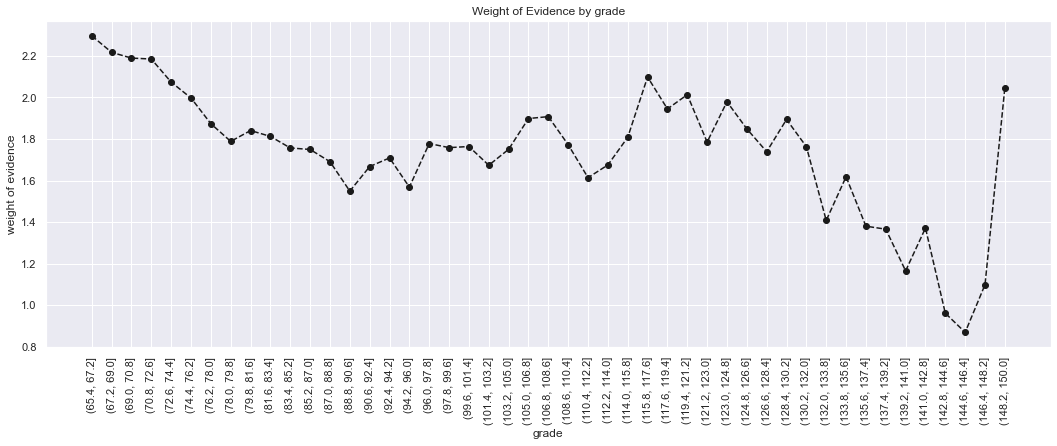

In [ ]:
#more variation of woe plot
plot_by_woe(df_temp.iloc[3:,:],90)

In [217]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['mths_since_issued_date:<38']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(38)),1,0)
df_inputs_prepr['mths_since_issued_date:38-39']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(38,40)),1,0)
df_inputs_prepr['mths_since_issued_date:40-41']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(40,42)),1,0)
df_inputs_prepr['mths_since_issued_date:42-48']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(42,49)),1,0)
df_inputs_prepr['mths_since_issued_date:49-52']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(49,53)),1,0)
df_inputs_prepr['mths_since_issued_date:53-64']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(53,65)),1,0)
df_inputs_prepr['mths_since_issued_date:65-84']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(65,85)),1,0)
df_inputs_prepr['mths_since_issued_date:>84']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(85,int(df_inputs_prepr['mths_since_issued_date'].max()))),1,0)

In [218]:
#apply the cut function on 'int_rate_factor'
df_inputs_prepr['int_rate_factor']=pd.cut(df_inputs_prepr['int_rate'],50)

In [220]:
#apply the woe_continuos function
df_temp=woe_continuous(df_inputs_prepr,'int_rate_factor',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",785,0.961783,0.002104,755.0,30.0,0.002272,0.000090,3.225520,NaN,NaN,0.762253
1,"(5.833, 6.246]",8459,0.980376,0.022677,8293.0,166.0,0.024960,0.000500,3.911179,0.018592,0.685659,0.762253
2,"(6.246, 6.658]",7826,0.971505,0.020980,7603.0,223.0,0.022883,0.000671,3.529126,0.008871,0.382053,0.762253
3,"(6.658, 7.071]",1816,0.973018,0.004868,1767.0,49.0,0.005318,0.000147,3.585218,0.001512,0.056092,0.762253
4,"(7.071, 7.484]",3143,0.976456,0.008426,3069.0,74.0,0.009237,0.000223,3.725042,0.003438,0.139824,0.762253
5,"(7.484, 7.897]",12581,0.962324,0.033727,12107.0,474.0,0.036439,0.001427,3.240332,0.014131,0.484710,0.762253
6,"(7.897, 8.31]",9687,0.949314,0.025969,9196.0,491.0,0.027678,0.001478,2.930080,0.013011,0.310252,0.762253
7,"(8.31, 8.722]",6594,0.965271,0.017677,6365.0,229.0,0.019157,0.000689,3.324848,0.015958,0.394768,0.762253
8,"(8.722, 9.135]",9539,0.937415,0.025572,8942.0,597.0,0.026913,0.001797,2.706597,0.027857,0.618250,0.762253
9,"(9.135, 9.548]",6681,0.963928,0.017910,6440.0,241.0,0.019383,0.000725,3.285487,0.026513,0.578889,0.762253


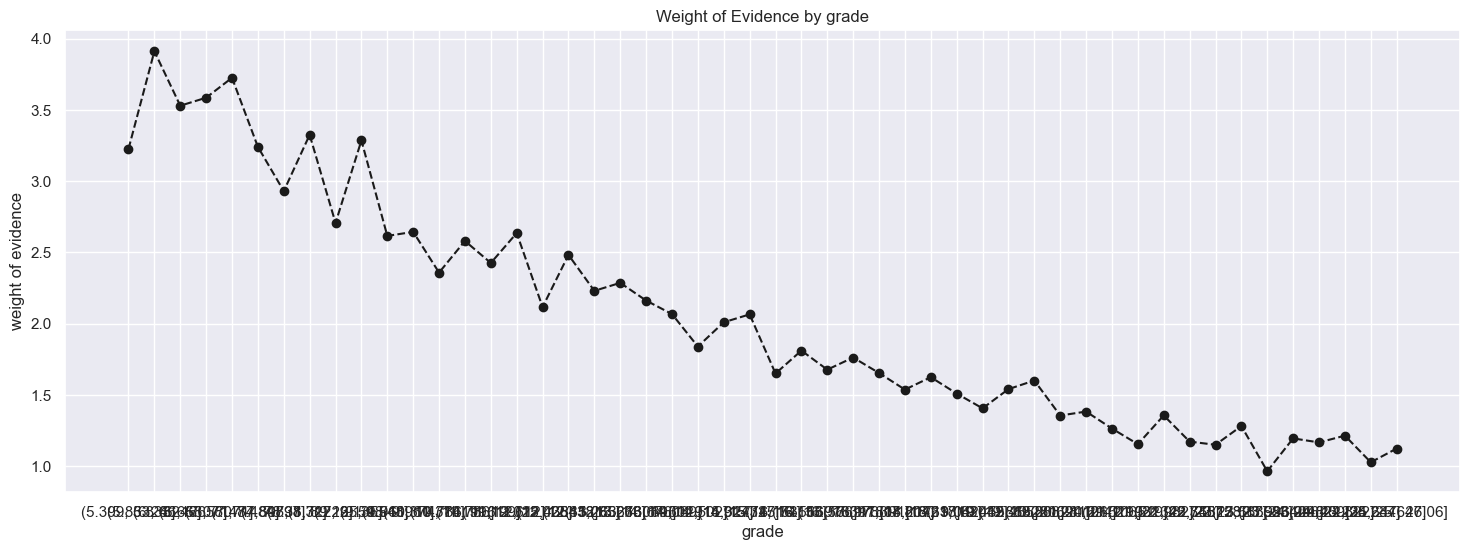

In [221]:
#plot the woe plot
plot_by_woe(df_temp)

In [222]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['int_rate:<9.548']=np.where((df_inputs_prepr['int_rate']<= 0.548),1,0)
df_inputs_prepr['int_rate:9.548-12.025']=np.where((df_inputs_prepr['int_rate']>9.548)&(df_inputs_prepr['int_rate']<=12.025),1,0)
df_inputs_prepr['int_rate:12.025-15.74']=np.where((df_inputs_prepr['int_rate']>12.025)&(df_inputs_prepr['int_rate']<=15.74),1,0)
df_inputs_prepr['int_rate:15.74-20.281']=np.where((df_inputs_prepr['int_rate']>15.74)&(df_inputs_prepr['int_rate']<=20.281),1,0)
df_inputs_prepr['int_rate:20.281']=np.where((df_inputs_prepr['int_rate']>20.281),1,0)



# **We will be repeating the similar steps for all continuous variables:**

**1.Apply the cut function if unique values are many**

**2.apply the woe_continuos function**

**3.plot the woe_plot**

**4.Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other**

In [223]:
#prepossing of 'funded_amt_factor'

df_inputs_prepr['funded_amnt_factor']=pd.cut(df_inputs_prepr['funded_amnt'],50)


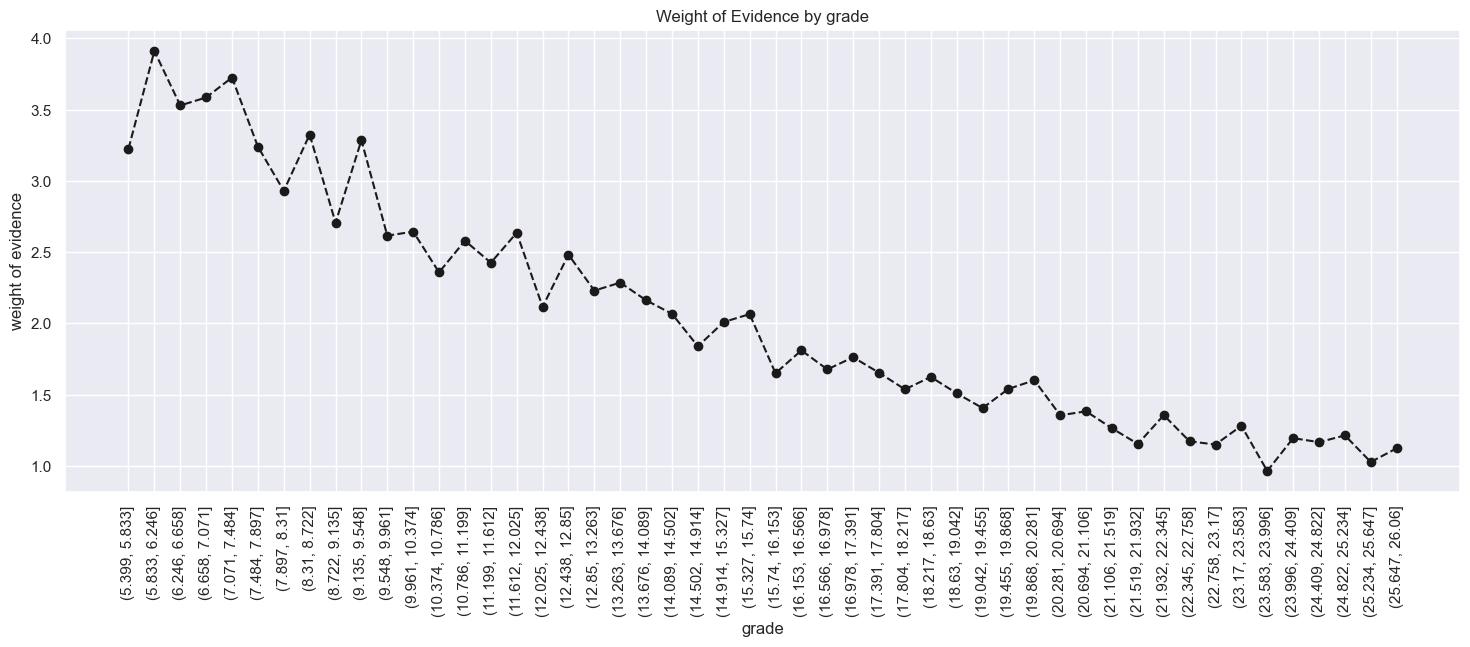

In [224]:
#plot the woe_plot
plot_by_woe(df_temp,90)

In [225]:
#convert the 'mths_since_earliest_cr_line' to float
df_inputs_prepr['mths_since_earliest_cr_line']=df_inputs_prepr['mths_since_earliest_cr_line'].astype('float')

In [227]:
#apply the cut function on 'mths_since_earliest_cr_line'
df_inputs_prepr['mths_since_earliest_cr_line_factor']=pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'],50)

In [229]:
#check the 'mths_since_earliest_cr_line_factor'
df_inputs_prepr['mths_since_earliest_cr_line_factor']

427211    (430.98, 444.04]
206088    (300.38, 313.44]
136020     (378.74, 391.8]
412305    (287.32, 300.38]
36159     (287.32, 300.38]
                ...       
259178     (326.5, 339.56]
365838    (222.02, 235.08]
131932    (222.02, 235.08]
146867     (313.44, 326.5]
121958    (430.98, 444.04]
Name: mths_since_earliest_cr_line_factor, Length: 373028, dtype: category
Categories (50, interval[float64, right]): [(-0.653, 13.06] < (13.06, 26.12] < (26.12, 39.18] < (39.18, 52.24] ... (600.76, 613.82] < (613.82, 626.88] < (626.88, 639.94] < (639.94, 653.0]]

In [230]:
#apply the woe_continuos function
df_temp=woe_continuous(df_inputs_prepr,'mths_since_earliest_cr_line_factor',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.653, 13.06]",24,0.875000,0.000064,21.0,3.0,0.000063,0.000009,1.945910,NaN,NaN,0.743543
1,"(13.06, 26.12]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743543
2,"(26.12, 39.18]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743543
3,"(39.18, 52.24]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743543
4,"(52.24, 65.3]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743543
5,"(65.3, 78.36]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743543
6,"(78.36, 91.42]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743543
7,"(91.42, 104.48]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743543
8,"(104.48, 117.54]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743543
9,"(117.54, 130.6]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743543


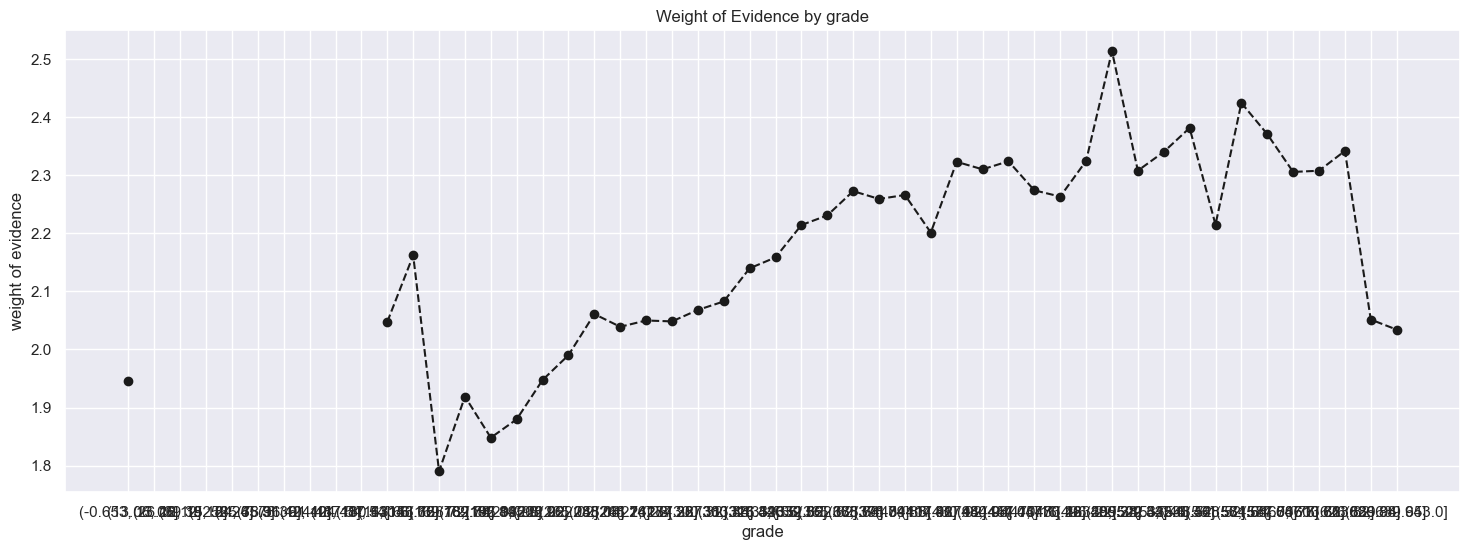

In [231]:
#plot the woe_plot
plot_by_woe(df_temp)

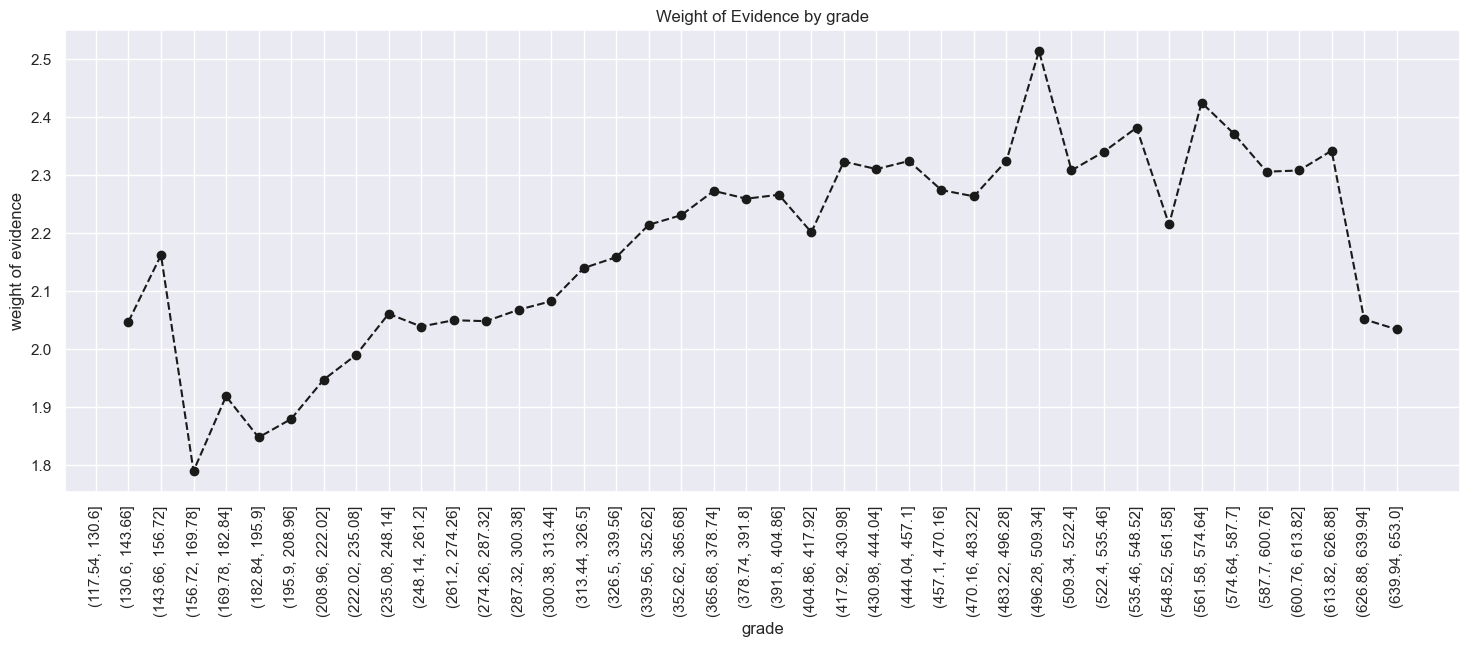

In [232]:
#plot for df_temp.iloc[3:,:],90
plot_by_woe(df_temp.iloc[3:,:],90)

In [12]:
#import the preprosess dataframe into a new csv file

loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
load_ds_targets_train.to_csv('loan_data_targets_train.csv')

loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
load_ds_targets_test.to_csv('loan_data_targets_test.csv')

NameError: name 'loan_data_inputs_train' is not defined

In [16]:
pd.options.display.max_rows= 500

In [13]:
load_data_inputs_train= pd.read_csv('Data/loan_data_inputs_train.csv',index_col=0)
load_data_targets_train=pd.read_csv('Data/loan_data_targets_train.csv',index_col=0,header=None)
load_data_inputs_test=pd.read_csv('Data/loan_data_inputs_test.csv',index_col=0)
load_data_targets_test=pd.read_csv('Data/loan_data_targets_test.csv',index_col=0,header=None)

C:\Users\User\AppData\Local\Temp\ipykernel_10544\1053195340.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  load_data_targets_train=pd.read_csv('Data/loan_data_targets_train.csv',index_col=0,header=None)


In [17]:
load_data_inputs_train.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'dti:20-25', 'dti:25-30', 'dti:30-35', 'dti:35-40', 'dti:>40',
       'mths_since_last_record:Missing', 'mths_since_last_record:0-90',
       'mths_since_last_record:90-120', 'mths_since_last_record:120-127',
       'mths_since_last_record:>=127'],
      dtype='object', length=338)

In [5]:
load_data_targets_train.head()

,1
0,
NaN,good_bad
427211.0,1
206088.0,1
136020.0,1
412305.0,0


In [18]:
load_data_targets_train=load_data_targets_train.drop(load_data_targets_train.index[0])

In [19]:
load_data_targets_train.head()

,1
0,
427211.0,1
206088.0,1
136020.0,1
412305.0,0
36159.0,0


In [20]:
#select only the important features we have created before in preprocessing steps and create a list of those features

feature_selection=[
'grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NC_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Verified',
'verification_status:Source Verified',
'verification_status:Not Verified',
    'purpose:educ_sm_b_wedd_ren_en_mov_house',
    'purpose:small_business',
    'purpose:educational',
    'purpose:renewable_energy',
    'purpose:moving',
    'purpose:house',
    'purpose:other',
    'purpose:medical',
    'purpose:wedding',
    'purpose:vacation',
    'purpose:debt_consolidation',
    'purpose:home_improvement',
    'purpose:major_purchase',
    'purpose:car',
    'purpose:credit_card',
    'initial_list_status:f',
    'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issued_date:<38',
'mths_since_issued_date:38-39',
'mths_since_issued_date:40-41',
'mths_since_issued_date:42-48',
'mths_since_issued_date:49-52',
'mths_since_issued_date:53-64',
'mths_since_issued_date:65-84',
'mths_since_issued_date:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:20.281',
    'mths_since_earliest_cr_line:<140',
    'mths_since_earliest_cr_line:140-239',
    'mths_since_earliest_cr_line:240-339',
    'mths_since_earliest_cr_line:340-439',
    'mths_since_earliest_cr_line:440-539',
    'mths_since_earliest_cr_line:540-600',
    'mths_since_earliest_cr_line:>600',
    'delinq_2yrs:0',
    'delinq_2yrs:0-3',
    'delinq_2yrs:3-7',
    'delinq_2yrs:7-9',
    'delinq_2yrs:9-11',
    'delinq_2yrs:11-12',
    'delinq_2yrs:12-18',
    'delinq_2yrs:>18',
    'inq_last_6mths:0',
    'inq_last_6mths:0-3',
    'inq_last_6mths:3-7',
    'inq_last_6mths:7-9',
    'inq_last_6mths:9-11',
    'inq_last_6mths:11-12',
    'inq_last_6mths:12-18',
    'inq_last_6mths:18',
    'open_acc:=0',
    'open_acc:0-1',
    'open_acc:1-4',
    'open_acc:4-28',
    'open_acc:28-35',
    'open_acc:35-45',
    'open_acc:>45',
    'pub_rec:0-3',
    'pub_rec:3-6',
    'pub_rec:6-8',
    'pub_rec:8',
    'total_acc:<0',
    'total_acc:0-4',
    'total_acc:4-62',
    'total_acc:62-72',
    'total_acc:72-85',
    'total_acc:>85',
    'acc_now_delinq:<0',
    'acc_now_delinq:0-1',
    'acc_now_delinq:1-2',
    'acc_now_delinq:2-3',
    'acc_now_delinq:3-5',
    'acc_now_delinq:>5',
'annual_inc:<20k',
'annual_inc:20k-30k',
'annual_inc:30k-40k',
'annual_inc:40k-50k',
'annual_inc:50k-60k',
'annual_inc:60k-70k',
'annual_inc:70k-80k',
'annual_inc:80k-90k',
'annual_inc:90k-100k',
'annual_inc:100k-120k',
'annual_inc:120k-140k',
'annual_inc:>140k',
'total_rev_hi_lim:<=5k',
'total_rev_hi_lim:5k_10k',
'total_rev_hi_lim:10k_20k',
'total_rev_hi_lim:20k_30k',
'total_rev_hi_lim:30k_40k',
'total_rev_hi_lim:40k_50k',
'total_rev_hi_lim:50k_65k',
'total_rev_hi_lim:65k_80k',
'total_rev_hi_lim:>80k',
'dti:<5',
'dti:5-10',
'dti:10-15',
'dti:15-20',
'dti:20-25',
'dti:25-30',
'dti:30-35',
'dti:35-40',
'dti:>40',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-90',
'mths_since_last_record:90-120',
'mths_since_last_record:120-127',
'mths_since_last_record:>=127','loan_amnt','funded_amnt','int_rate','installment','recoveries','total_rec_prncp']

In [21]:
load_data_ref_cat=load_data_inputs_train.reindex(feature_selection,axis='columns')

In [22]:
load_data_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_record:0-90,mths_since_last_record:90-120,mths_since_last_record:120-127,mths_since_last_record:>=127,loan_amnt,funded_amnt,int_rate,installment,recoveries,total_rec_prncp
427211,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,24000,24000,8.90,762.08,0.00,13901.70
206088,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,10000,10000,14.33,343.39,0.00,10000.00
136020,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,20425,20425,8.90,648.56,0.00,17241.38
412305,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,17200,17200,16.59,609.73,0.00,7740.50
36159,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,8400,8400,12.84,282.40,623.79,3566.58


In [23]:
ref_categories=['grade:G',
               'home_ownership:RENT_OTHER_NONE_ANY',
               'addr_state:ND_NE_IA_NC_FL_HI_AL',
               'verification_status:Verified',
                'purpose:educ_sm_b_wedd_ren_en_mov_house',
                'initial_list_status:f',
                'term:60',
                'emp_length:0',
                'mths_since_issued_date:>84',
                'int_rate:20.281',
                'mths_since_earliest_cr_line:<140',
                'delinq_2yrs:>18',
                'inq_last_6mths:7-9',
                'open_acc:=0',
                'pub_rec:0-3',
                'total_acc:>85',
                'acc_now_delinq:<0',
                'total_rev_hi_lim:<=5k',
                'annual_inc:<20k',
                'dti:>40',
                'mths_since_last_delinq:0-3',
                'mths_since_last_record:Missing'
               ]

In [24]:
input_train=load_data_ref_cat.drop(ref_categories,axis=1)

In [25]:
input_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,...,mths_since_last_record:0-90,mths_since_last_record:90-120,mths_since_last_record:120-127,mths_since_last_record:>=127,loan_amnt,funded_amnt,int_rate,installment,recoveries,total_rec_prncp
427211,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,24000,24000,8.90,762.08,0.00,13901.70
206088,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,10000,10000,14.33,343.39,0.00,10000.00
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,20425,20425,8.90,648.56,0.00,17241.38
412305,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,17200,17200,16.59,609.73,0.00,7740.50
36159,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,8400,8400,12.84,282.40,623.79,3566.58


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [28]:
lr = LogisticRegression(max_iter=200)

In [37]:
load_data_targets_train.head()

,1
0,
427211.0,1.0
206088.0,1.0
136020.0,1.0
412305.0,0.0
36159.0,0.0


In [30]:
input_train.isnull().sum()

grade:A                                0
grade:B                                0
grade:C                                0
grade:D                                0
grade:E                                0
grade:F                                0
home_ownership:OWN                     0
home_ownership:MORTGAGE                0
addr_state:NM_VA                       0
addr_state:OK_TN_MO_LA_MD_NC           0
addr_state:UT_KY_AZ_NJ                 0
addr_state:AR_MI_PA_OH_MN              0
addr_state:RI_MA_DE_SD_IN              0
addr_state:GA_WA_OR                    0
addr_state:WI_MT                       0
addr_state:IL_CT                       0
addr_state:KS_SC_CO_VT_AK_MS           0
addr_state:WV_NH_WY_DC_ME_ID           0
verification_status:Source Verified    0
verification_status:Not Verified       0
purpose:small_business                 0
purpose:educational                    0
purpose:renewable_energy               0
purpose:moving                         0
purpose:house   

In [31]:
input_train=input_train.astype(float)
load_data_targets_train=load_data_targets_train.astype(float)

In [32]:
lr.fit(input_train,load_data_targets_train)

F:\DataScience\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=200)

In [38]:
load_data_ref_test=load_data_inputs_test.reindex(feature_selection,axis='columns')

In [39]:
inputs_test=load_data_ref_test.drop(ref_categories,axis=1)

In [40]:
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,...,mths_since_last_record:0-90,mths_since_last_record:90-120,mths_since_last_record:120-127,mths_since_last_record:>=127,loan_amnt,funded_amnt,int_rate,installment,recoveries,total_rec_prncp
427211,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,24000,24000,8.90,762.08,0.00,13901.70
206088,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,10000,10000,14.33,343.39,0.00,10000.00
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,20425,20425,8.90,648.56,0.00,17241.38
412305,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,17200,17200,16.59,609.73,0.00,7740.50
36159,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,8400,8400,12.84,282.40,623.79,3566.58


In [41]:
inputs_test.isnull().sum()

grade:A                                0
grade:B                                0
grade:C                                0
grade:D                                0
grade:E                                0
grade:F                                0
home_ownership:OWN                     0
home_ownership:MORTGAGE                0
addr_state:NM_VA                       0
addr_state:OK_TN_MO_LA_MD_NC           0
addr_state:UT_KY_AZ_NJ                 0
addr_state:AR_MI_PA_OH_MN              0
addr_state:RI_MA_DE_SD_IN              0
addr_state:GA_WA_OR                    0
addr_state:WI_MT                       0
addr_state:IL_CT                       0
addr_state:KS_SC_CO_VT_AK_MS           0
addr_state:WV_NH_WY_DC_ME_ID           0
verification_status:Source Verified    0
verification_status:Not Verified       0
purpose:small_business                 0
purpose:educational                    0
purpose:renewable_energy               0
purpose:moving                         0
purpose:house   

In [43]:
y_pred=lr.predict(inputs_test)

In [44]:
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [45]:
a=y_pred.astype(int)

In [52]:
y_pred_prob=lr.predict_proba(inputs_test)

In [48]:
y_pred_prob

array([[5.54715978e-03, 9.94452840e-01],
       [2.47287850e-03, 9.97527121e-01],
       [2.47596556e-04, 9.99752403e-01],
       ...,
       [5.64496902e-04, 9.99435503e-01],
       [9.40252011e-04, 9.99059748e-01],
       [1.99410052e-03, 9.98005899e-01]])

In [53]:
y_pred_prob=y_pred_prob[:][:,1]

In [54]:
y_pred_prob

array([0.99445284, 0.99752712, 0.9997524 , ..., 0.9994355 , 0.99905975,
       0.9980059 ])

In [55]:
loan_target_temp=load_data_targets_test

In [56]:
loan_target_temp.head()

,1
0,
NaN,good_bad
362514.0,1
288564.0,1
213591.0,1
263083.0,1


In [57]:
loan_target_temp.reset_index(drop=True,inplace=True)

In [59]:
loan_target_temp.drop(loan_target_temp.index[0],inplace=True)

In [71]:
inputs_test.shape

(373028, 132)

In [63]:
df_actual=pd.concat((loan_target_temp,pd.DataFrame(y_pred_prob)),axis=1)

In [64]:
df_actual.head()

,1,0
1,1,0.997527
2,1,0.999752
3,1,0.783374
4,1,0.000000
5,1,0.970082


In [65]:
df_actual.columns=['real_data','predicted_prob']

In [66]:
df_actual.head()

,real_data,predicted_prob
1,1,0.997527
2,1,0.999752
3,1,0.783374
4,1,0.000000
5,1,0.970082


In [67]:
tr=0.9
df_actual['y_predict']=np.where(df_actual.predicted_prob>tr,1,0)

In [72]:
df_actual

,real_data,predicted_prob,y_predict
1,1,0.997527,1
2,1,0.999752,1
3,1,0.783374,0
4,1,0.000000,0
5,1,0.970082,1
...,...,...,...
373023,NaN,0.964743,1
373024,NaN,0.911827,1
373025,NaN,0.999436,1
373026,NaN,0.999060,1
